In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# A linearly separable training set.....................
X=np.array([[1.5,0.7],[1.6,1.0],[2.0,0.8],[1.2,1.5],[0.7,1.6],[1.7,1.0],[0.8,1.9],[0.9,0.8],[1.1,1.3],[1.0,1.5],[1.5,3.5],[2.5,2.0],[3.0,1.6],[3.0,2.5],[2.0,3.0],[2.8,1.4],[3.2,3.4],[2.5,2.5],[3.5,2.2],[2.5,3.2]])
y=np.array([+1,+1,+1,+1,+1,+1,+1,+1,+1,+1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1])

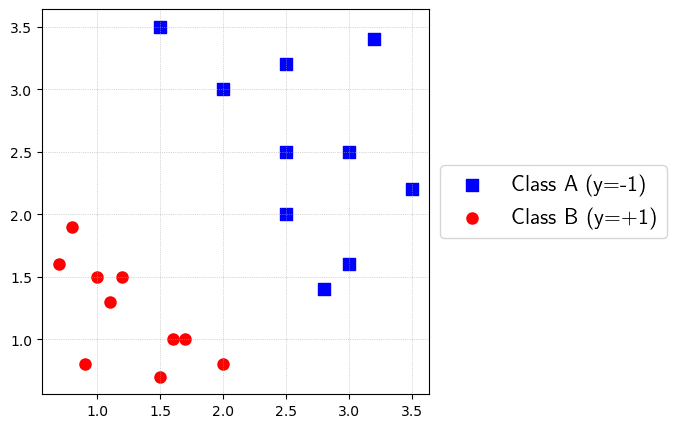

In [3]:
# Plot Points............................
fig, ax = plt.subplots(1, 1, figsize=[5, 5])
plt.rc('text', usetex=True)
ax.scatter(X[y==-1,0],X[y==-1,1],s=64,edgecolors='blue',marker='s', facecolors='blue',label='Class A (y=-1)')
ax.scatter(X[y==+1,0],X[y==+1,1],s=64,edgecolors='red',marker='o', facecolors='red',label='Class B (y=+1)')
ax.legend(loc='center left', bbox_to_anchor=(1, .5), ncol=1, fontsize=16,facecolor=[1,1,1])
ax.grid(linestyle=':', linewidth=0.5)

In [4]:
def pers_plot(ax,cord,w,b,X=[],y=[]):  
    ax.grid(linestyle=':', linewidth=0.5)
    ax.set_xlim(cord[0],cord[1])
    ax.set_ylim(cord[2],cord[3])


    if w[1]!=0:
        xx=np.array([cord[0],cord[1]])
        yy=np.array([-(w[0]*cord[0]+b)/w[1],-(w[0]*cord[1]+b)/w[1]])

        if w[0]*xx[0]+w[1]*(yy[0]+.1)+b<0:
            manfi,mosbat=cord[3],cord[2]
        else:
            mosbat,manfi=cord[3],cord[2]

        ax.fill_between(xx,manfi,yy,color=[0,0,1],alpha=.1,label='Negative Part')
        ax.fill_between(xx,mosbat,yy,color=[1,0,0],alpha=.1,label='Positive Part')
        ax.plot([cord[0],cord[1]],[-(w[0]*cord[0]+b)/w[1],-(w[0]*cord[1]+b)/w[1]],linewidth=4,color=[0,0,0],label='$'+str(w[0])+'x_1+'+str(w[1])+'x_2+'+str(b)+'=0$') #Plot Line

    else:
        z=-b/w[0]
        xx=np.array([z,z])
        yy=np.array([cord[2],cord[3]])   

        xxx=np.array([cord[0],z,cord[1]])
        ax.fill_between(xxx,cord[2],cord[3],where=w[0]*xxx+b<=0,color=[0,0,1],alpha=.1,label='Negative Part')
        ax.fill_between(xxx,cord[2],cord[3],where=w[0]*xxx+b>=0,color=[1,0,0],alpha=.1,label='Negative Part')
        ax.plot(xx,yy,linewidth=4,color=[0,0,0],label='$'+str(w[0])+'x_1+'+str(w[1])+'x_2+'+str(b)+'=0$') #Plot Line

    if len(y)>0:
        ax.scatter(X[y==-1,0],X[y==-1,1],s=64,edgecolors='blue',marker='s', facecolors='blue',label='Class A (y=-1)')
        ax.scatter(X[y==+1,0],X[y==+1,1],s=64,edgecolors='red',marker='o', facecolors='red',label='Class B (y=+1)')
    
    ax.legend(loc='center left', bbox_to_anchor=(1, .5), ncol=1, fontsize=16,facecolor=[1,1,1])


In [8]:
# Perceptron Algorithm.............................
w,b=np.array([1,-2]),-2
eta=1

inds=np.array([i for i in range(X.shape[0])])
for k in range(4000):
   
    fig, ax = plt.subplots(1, 1, figsize=[5, 5])
    pers_plot(ax,[-5,5,-5,5],w,b,X,y)

    ii=inds[y*(np.matmul(X,w.transpose())+b)<=0] # Index of wrong samples
    if len(ii)==0:
        break

    t=ii[np.random.randint(len(ii))]

    ax.scatter([X[t,0]],[X[t,1]],marker='*', facecolors=[1,1,0])
    plt.show()

    w=w+eta*y[t]*X[t]
    b=b+eta*y[t]
   # print('m=',-w[0]/w[1],'b=',-b/w[1])

if len(ii)==0:
    print("after ", k," iterations, with eta=",eta," the line seperator is find: w=",w," and b=",b)
else:
    print("after ", k+1," iterations, with eta=",eta, "the line seperator is not find.")


after  25  iterations, with eta= 1  the line seperator is find: w= [-1.8 -1. ]  and b= 5
